In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import pandas as pd

In [2]:
# Dataset separates flowers into 3 different species: Setosa, Versicolor and Virginica
# info given is sepal length, sepal width, petal length, petal width

In [3]:
# Constant definition
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

In [4]:
# here we use keras (TensorFlow module) to grab our datasets and read them into a pandas dataframe
train_path = tf.keras.utils.get_file(
"iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
"iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

In [5]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [6]:
# Because we want to train our model to predict species of a flower from given data, we pop Species column from training dataframe
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


<AxesSubplot:>

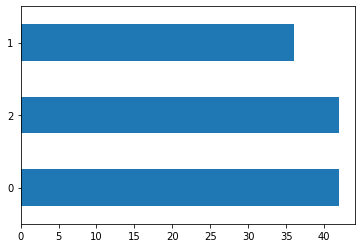

In [7]:
train_y.value_counts().plot(kind='barh')

In [8]:
train.shape

(120, 4)

In [9]:
# Input function

In [10]:
def input_fn(features, labels, training=True, batch_size=256):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

In [11]:
# Feature columns

In [12]:
# print(train.head())
# print(train.keys())

In [13]:
my_feature_columns = []
for key in train.keys():    # keys in datasets are column names, we put column names when we read csv data with pandas at the start
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [14]:
# Building the model

In [15]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively
    hidden_units=[30, 10],
    # The model must choose between 3 classes (our flower species)
    n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\DZILAJ~1\\AppData\\Local\\Temp\\tmpg0ndrp2w', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [16]:
# Training data

In [17]:
classifier.train(
input_fn=lambda: input_fn(train, train_y, training=True),
steps=5000)     # DNNClassifier uses steps instead of epochs

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DZILAJ~1\AppData\Local\Temp\tmpg0ndrp2w\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 1.5769954, step = 0
INFO:tensorflow:global_step/sec: 262.11
INFO:tensorflow:loss = 1.1125377, step = 100 (0.383 sec)
INFO:tensorflow:global_step/sec: 293.736
INFO:tensorflow:loss = 0.9879255, step = 200 (0.340 sec)


In [18]:
eval_result = classifier.evaluate(input_fn=lambda: input_fn(test, test_y, training=False))
print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result)) # Beautifies the accuracy output

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-06-16T14:28:21
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DZILAJ~1\AppData\Local\Temp\tmpg0ndrp2w\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.22704s
INFO:tensorflow:Finished evaluation at 2021-06-16-14:28:21
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.6666667, average_loss = 0.53896195, global_step = 5000, loss = 0.53896195
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: C:\Users\DZILAJ~1\AppData\Local\Temp\tmpg0ndrp2w\model.ckpt-5000

Test set accuracy: 0.667



In [19]:
# Predictions

In [23]:
def input_fn(features, batch_size=256):
    # Converts the inputs to a dataset without labels
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
    valid = True
    while valid:
        val = input(feature + ": ")
        if not val.isdigit(): valid = False

    predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:   # all predictions come back as dictionaries
    # print(pred_dict)    # see all the data and decide which values to pull out
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print(class_id)
    print('Prediction is "{}" ({:.1f}%)'.format(SPECIES[class_id], 100*probability))

Please type numeric values as prompted.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DZILAJ~1\AppData\Local\Temp\tmpg0ndrp2w\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'logits': array([-0.7160343,  0.6328198,  0.7004036], dtype=float32), 'probabilities': array([0.11141542, 0.4292845 , 0.45930004], dtype=float32), 'class_ids': array([2], dtype=int64), 'classes': array([b'2'], dtype=object), 'all_class_ids': array([0, 1, 2]), 'all_classes': array([b'0', b'1', b'2'], dtype=object)}
2
Prediction is "Virginica" (45.9%)
